# Tracking Covid19 statistics in South Africa

Using data from John Hopkins University  
https://github.com/CSSEGISandData/COVID-19  
https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6  

Data is taken from the file in this folder:    
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series  
then processed with Pandas and plot created.



In [1]:
import pandas as pd
import numpy as np
import urllib.request as request
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.dates as mdates
from datetime import datetime


In [2]:
ghFolder = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series'
ghFiles = [
    ['Confirmed','time_series_covid19_confirmed_global.csv'],
    ['Deaths','time_series_covid19_deaths_global.csv'],
    ['Recovered','time_series_covid19_recovered_global.csv'],
    ]

In [3]:
dfs={}
for lst  in ghFiles:
    # read data from github
    dfs[lst[0]] = pd.read_csv('/'.join([ghFolder,lst[1]]))

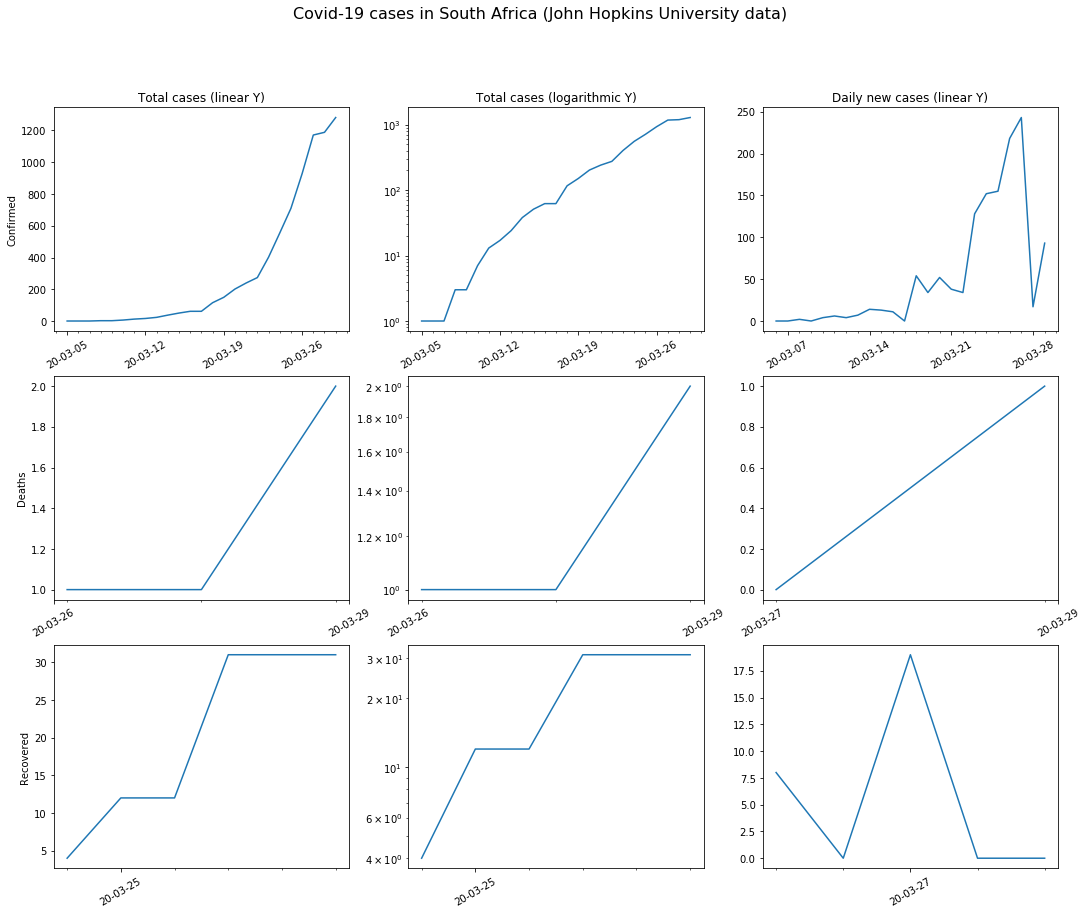

In [12]:
fig, axs = plt.subplots(3,3,figsize=(18,14))
ptypes = ['Total cases (linear Y)','Total cases (logarithmic Y)','Daily new cases (linear Y)']
# formatter = DateFormatter('%m/%d/%y')

for i,key in enumerate(dfs.keys()):
    df = dfs[key]
    dfT = df[df['Country/Region']=='South Africa'].T
    dfT = dfT.drop(['Province/State', 'Country/Region','Lat','Long'])
    dfT.columns=['Count']
    
    # find all dates with zero incidence
    indexNames = dfT[dfT['Count'] == 0].index
     # Delete these row indexes from dataFrame
    dfT = dfT.drop(indexNames)

    # get dates from string
    dfT.reset_index(level=0, inplace=True)
    dfT['Date'] = pd.to_datetime(dfT['index'] ,dayfirst=True, format='%m/%d/%y')

    # plot the data
    fig.suptitle('Covid-19 cases in South Africa (John Hopkins University data)', fontsize=16)
    axs[i, 0].plot(dfT['Date'],dfT['Count'])
    axs[i, 1].semilogy(dfT['Date'],dfT['Count'])
    axs[i, 2].plot(dfT['Date'][1:],np.diff(dfT['Count']))

    for j in [0,1,2]:
        axs[j, i].xaxis.set_tick_params(rotation=30, labelsize=10)
        # format the ticks
        axs[j, i].xaxis.set_major_locator(mdates.DayLocator(interval=7))
        axs[j, i].xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
        axs[j, i].xaxis.set_minor_locator(mdates.DayLocator())
        if j==0:
            axs[j,i].set_title(ptypes[i])
            axs[i,0].set_ylabel(key)
